#### Description

In [1]:
print('Name:Leo pauly')
print('Description: Program for implementing Flow-DNN with unseen cases')

Name:Leo pauly
Description: Program for implementing Flow-DNN with unseen cases


For reference, PINN & SciANN package tutorial: https://www.youtube.com/watch?v=20NEQFcdp3o&ab_channel=DesignSafe-CIMedia

#### **Install**

This will install SciANN library and all the dependecies

In [2]:
#!pip install sciann

#### **Import**

In [3]:
import numpy as np
np.random.seed(64)
import matplotlib.pyplot as plt 
import sciann as sn 
import pandas as pd
from numpy import pi
from sciann.utils.math import diff, sign, sin
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
np.set_printoptions(suppress=True)

---------------------- SCIANN 0.6.3.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 


Run the following only if using google Colab. It will ennable you to load data from google drive. Ignore if running on you local machine. 

In [4]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#### **Flow-PINN** 

Details of defining functionls is available here: https://www.sciann.com/getting-started/functional-guide/

Details of deifing the model can be found here: https://www.sciann.com/scimodels/#scimodel



In [6]:
x = sn.Variable('x',dtype='float64')
y = sn.Variable('y',dtype='float64')
v = sn.Functional('v', [x,y], 2*[20], 'relu')
h = sn.Functional('h', [x,y], 2*[20], 'relu')

In [7]:
d1 = sn.Data(v)
d3 = sn.Data(h)

####  **Model definition**

In [8]:
m = sn.SciModel([x,y], [d1,d3],loss_func='mse')

#### **Dataset**

Datasets in .xlxs format are loaded using pandas python library: https://pandas.pydata.org/

In [13]:
v_data_df_1=pd.read_excel('../Data/1Well_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_1=pd.read_excel('../Data/1Well_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [18]:
v_data_df_2=pd.read_excel('../Data/2Wells_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_2=pd.read_excel('../Data/2Wells_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [20]:
v_data_df_3=pd.read_excel('../Data/Dam_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_3=pd.read_excel('../Data/Dam_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [55]:
v_data_df_4=pd.read_excel('../Data/Pit_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_4=pd.read_excel('../Data/Pit_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [29]:
v_data_df_test=pd.read_excel('../Data/PitWithWell_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_test=pd.read_excel('../Data/PitWithWell_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [23]:
x1_data_1=np.array(v_data_df_1['X'].values)
x2_data_1=np.array(v_data_df_1['Y'].values)

v_data_1=np.array(v_data_df_1['VINIT'].values)
print('v_data_1:',v_data_1.shape)

h_data_1=np.array(h_data_df_1['FINIT'].values)
print('h_data_1:',h_data_1.shape)

v_data_1: (9587,)
h_data_1: (9587,)


In [24]:
x1_data_2=np.array(v_data_df_2['X'].values)
x2_data_2=np.array(v_data_df_2['Y'].values)

v_data_2=np.array(v_data_df_2['VINIT'].values)
print('v_data_2:',v_data_2.shape)

h_data_2=np.array(h_data_df_2['FINIT'].values)
print('h_data_2:',h_data_2.shape)

v_data_2: (7919,)
h_data_2: (7919,)


In [25]:
x1_data_3=np.array(v_data_df_3['X'].values)
x2_data_3=np.array(v_data_df_3['Y'].values)

v_data_3=np.array(v_data_df_3['VINIT'].values)
print('v_data_3:',v_data_3.shape)

h_data_3=np.array(h_data_df_3['FINIT'].values)
print('h_data_3:',h_data_3.shape)

v_data_3: (4020,)
h_data_3: (4020,)


In [56]:
x1_data_4=np.array(v_data_df_4['X'].values)
x2_data_4=np.array(v_data_df_4['Y'].values)

v_data_4=np.array(v_data_df_4['VINIT'].values)
print('v_data_4:',v_data_4.shape)

h_data_4=np.array(h_data_df_4['FINIT'].values)
print('h_data_4:',h_data_4.shape)

v_data_4: (7929,)
h_data_4: (7929,)


In [30]:
x1_data_test=np.array(v_data_df_test['X'].values)
x2_data_test=np.array(v_data_df_test['Y'].values)

v_data_test=np.array(v_data_df_test['VINIT'].values)
print('v_data_test:',v_data_test.shape)

h_data_test=np.array(h_data_df_test['FINIT'].values)
print('h_data_test:',h_data_test.shape)

v_data_test: (7899,)
h_data_test: (7899,)


**Visualizing data**

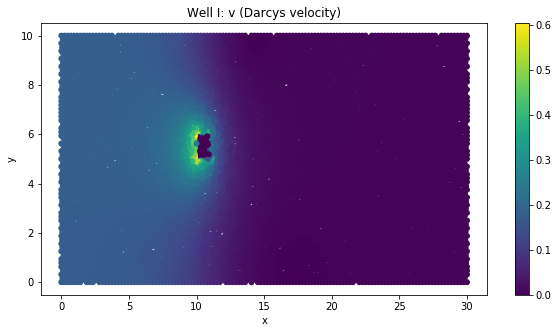

In [34]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_1, x2_data_1, c=v_data_1, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Well I: v (Darcys velocity)')
plt.colorbar()
plt.show()

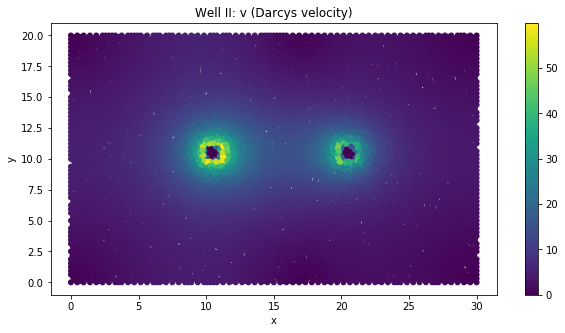

In [35]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_2, x2_data_2, c=v_data_2, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Well II: v (Darcys velocity)')
plt.colorbar()
plt.show()

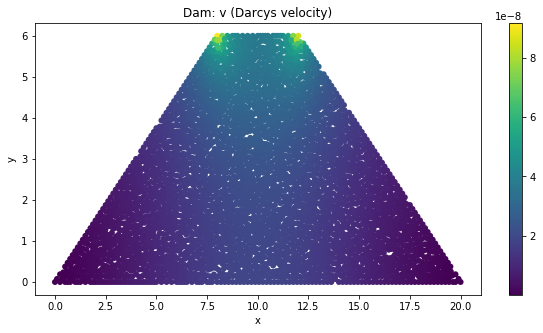

In [37]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_3, x2_data_3, c=v_data_3, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dam: v (Darcys velocity)')
plt.colorbar()
plt.show()

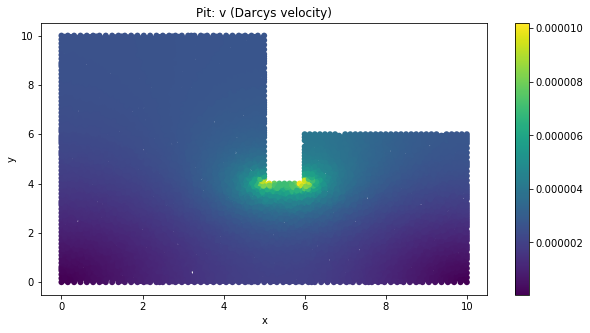

In [39]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_4, x2_data_4, c=v_data_4, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pit: v (Darcys velocity)')
plt.colorbar()
plt.show()

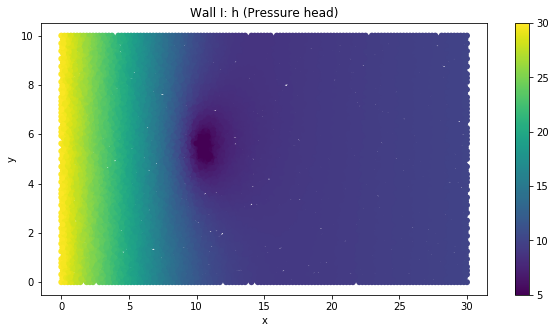

In [42]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_1, x2_data_1, c=h_data_1, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wall I: h (Pressure head)')
plt.colorbar()
plt.show()

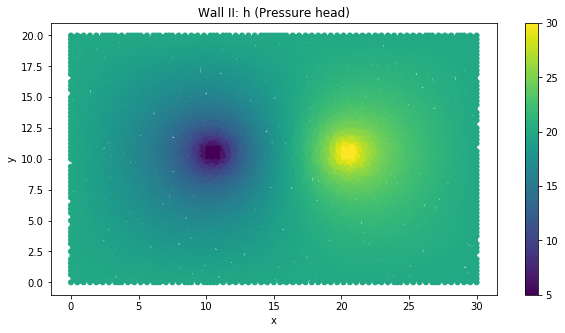

In [43]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_2, x2_data_2, c=h_data_2, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wall II: h (Pressure head)')
plt.colorbar()
plt.show()

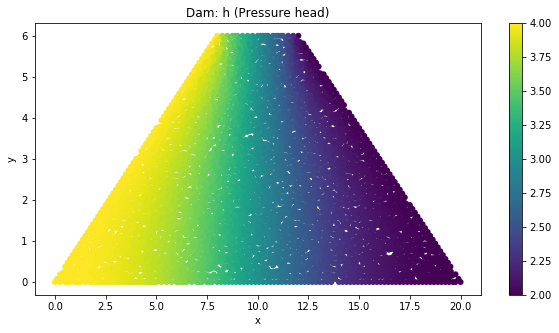

In [45]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_3, x2_data_3, c=h_data_3, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dam: h (Pressure head)')
plt.colorbar()
plt.show()

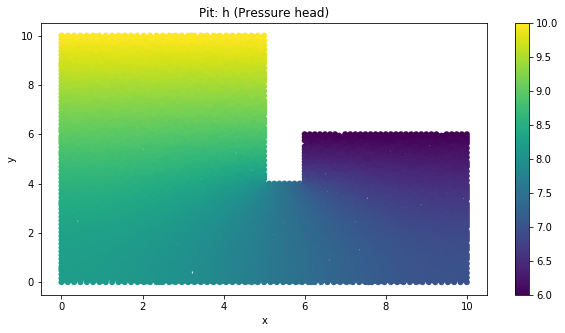

In [58]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_4, x2_data_4, c=h_data_4, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pit: h (Pressure head)')
plt.colorbar()
plt.show()

#### Data: Preprocessing

In [18]:
train_test_ratio=.7
x1_train, x1_test,x2_train, x2_test, v_train, v_test,K_train, K_test,h_train, h_test = train_test_split(x1_data,x2_data, v_data,K_data,h_data, train_size=train_test_ratio, random_state=512)
print('test:train ratio:',train_test_ratio)
print('Training sizes(x1,x2,v,K,h):',x1_train.shape,x2_train.shape,v_train.shape,K_train.shape,h_train.shape)
print('Testing sizes(x1,x2,v,K,h):',x1_test.shape,x2_test.shape,v_test.shape,K_test.shape,h_test.shape)
C1_train=B1_train=B2_train=B3_train=B4_train = 'zeros'
C1_test=B1_test=B2_test=B3_test=B4_test = np.zeros(x1_test.shape)

test:train ratio: 0.7
Training sizes(x1,x2,v,K,h): (637,) (637,) (637,) (637,) (637,)
Testing sizes(x1,x2,v,K,h): (273,) (273,) (273,) (273,) (273,)


In [19]:
v_pred = v.eval(m, [x1_test,x2_test])
h_pred = h.eval(m, [x1_test,x2_test])
K_pred = K.eval(m, [x1_test,x1_test])
print('MSE for v before training:',(mean_squared_error(v_test,v_pred)))
print('MSE for h before training:',(mean_squared_error(h_test,h_pred)))
print('MSE for K before training:',(mean_squared_error(K_test,K_pred)))

MSE for v before training: 0.2652275173875789
MSE for h before training: 0.18363165142654894
MSE for K before training: 0.11417765163425236


#### **Training**

Details of the model.train function can be found here: https://www.sciann.com/scimodels/#train

In [20]:
learning_rate=0.001
epochs=50
history = m.train([x1_train,x2_train], [v_train,K_train,h_train,C1_train,B1_train,B2_train,B3_train,B4_train], learning_rate=learning_rate, epochs=epochs, verbose=2,batch_size=100,validation_data=([x1_test,x2_test],[v_test,K_test,h_test,C1_test,B1_test,B2_test,B3_test,B4_test]))



Total samples: 637 
Batch size: 100 
Total batches: 7 

Epoch 1/50


/home/home01/cnlp/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7/7 - 2s - loss: 0.8696 - v_loss: 0.2311 - K_loss: 0.3796 - h_loss: 0.1620 - sub_loss: 0.0620 - mul_3_loss: 0.0250 - mul_4_loss: 0.0034 - mul_7_loss: 0.0182 - mul_10_loss: 0.0075 - val_loss: 0.6949 - val_v_loss: 0.1797 - val_K_loss: 0.3238 - val_h_loss: 0.1273 - val_sub_loss: 0.0371 - val_mul_3_loss: 0.0177 - val_mul_4_loss: 4.6516e-04 - val_mul_7_loss: 0.0060 - val_mul_10_loss: 0.0028 - lr: 0.0010 - time: 2.3277
Epoch 2/50
7/7 - 2s - loss: 0.5817 - v_loss: 0.1569 - K_loss: 0.2605 - h_loss: 0.1113 - sub_loss: 0.0306 - mul_3_loss: 0.0128 - mul_4_loss: 0.0019 - mul_7_loss: 0.0076 - mul_10_loss: 0.0043 - val_loss: 0.4727 - val_v_loss: 0.1210 - val_K_loss: 0.2219 - val_h_loss: 0.0857 - val_sub_loss: 0.0304 - val_mul_3_loss: 0.0095 - val_mul_4_loss: 2.5557e-04 - val_mul_7_loss: 0.0017 - val_mul_10_loss: 0.0021 - lr: 0.0010 - time: 2.0219
Epoch 3/50
7/7 - 2s - loss: 0.4069 - v_loss: 0.1066 - K_loss: 0.1716 - h_loss: 0.0717 - sub_loss: 0.0384 - mul_3_loss: 0.0080 - mul_4_loss: 0.0013 - mul_7_

Epoch 20/50
7/7 - 5s - loss: 0.1870 - v_loss: 0.0629 - K_loss: 0.0466 - h_loss: 0.0196 - sub_loss: 0.0544 - mul_3_loss: 7.0561e-05 - mul_4_loss: 0.0016 - mul_7_loss: 5.9941e-04 - mul_10_loss: 6.7209e-04 - val_loss: 0.1951 - val_v_loss: 0.0665 - val_K_loss: 0.0481 - val_h_loss: 0.0210 - val_sub_loss: 0.0566 - val_mul_3_loss: 1.6305e-04 - val_mul_4_loss: 4.5570e-04 - val_mul_7_loss: 0.0014 - val_mul_10_loss: 8.9672e-04 - lr: 0.0010 - time: 5.1773
Epoch 21/50
7/7 - 5s - loss: 0.1862 - v_loss: 0.0629 - K_loss: 0.0465 - h_loss: 0.0198 - sub_loss: 0.0540 - mul_3_loss: 5.8506e-05 - mul_4_loss: 0.0010 - mul_7_loss: 6.5849e-04 - mul_10_loss: 6.5883e-04 - val_loss: 0.1939 - val_v_loss: 0.0669 - val_K_loss: 0.0460 - val_h_loss: 0.0213 - val_sub_loss: 0.0567 - val_mul_3_loss: 2.1256e-04 - val_mul_4_loss: 4.5215e-04 - val_mul_7_loss: 0.0014 - val_mul_10_loss: 8.8726e-04 - lr: 0.0010 - time: 5.3991
Epoch 22/50
7/7 - 6s - loss: 0.1849 - v_loss: 0.0632 - K_loss: 0.0442 - h_loss: 0.0197 - sub_loss: 0.0

Epoch 39/50
7/7 - 9s - loss: 0.1705 - v_loss: 0.0604 - K_loss: 0.0355 - h_loss: 0.0201 - sub_loss: 0.0539 - mul_3_loss: 6.7033e-04 - mul_4_loss: 0.0013 - mul_7_loss: 1.7704e-04 - mul_10_loss: 0.0015 - val_loss: 0.1831 - val_v_loss: 0.0622 - val_K_loss: 0.0353 - val_h_loss: 0.0245 - val_sub_loss: 0.0582 - val_mul_3_loss: 0.0011 - val_mul_4_loss: 3.1084e-04 - val_mul_7_loss: 3.6967e-04 - val_mul_10_loss: 0.0012 - lr: 0.0010 - time: 9.0197
Epoch 40/50
7/7 - 9s - loss: 0.1707 - v_loss: 0.0588 - K_loss: 0.0331 - h_loss: 0.0212 - sub_loss: 0.0526 - mul_3_loss: 8.1870e-04 - mul_4_loss: 0.0010 - mul_7_loss: 1.6584e-04 - mul_10_loss: 0.0013 - val_loss: 0.1822 - val_v_loss: 0.0628 - val_K_loss: 0.0358 - val_h_loss: 0.0253 - val_sub_loss: 0.0545 - val_mul_3_loss: 0.0013 - val_mul_4_loss: 5.3146e-04 - val_mul_7_loss: 0.0010 - val_mul_10_loss: 9.0796e-04 - lr: 0.0010 - time: 9.0255
Epoch 41/50
7/7 - 9s - loss: 0.1705 - v_loss: 0.0605 - K_loss: 0.0331 - h_loss: 0.0213 - sub_loss: 0.0504 - mul_3_loss

#### **Plotting Loss**

In [21]:
print(history.history.keys())

dict_keys(['loss', 'v_loss', 'K_loss', 'h_loss', 'sub_loss', 'mul_3_loss', 'mul_4_loss', 'mul_7_loss', 'mul_10_loss', 'val_loss', 'val_v_loss', 'val_K_loss', 'val_h_loss', 'val_sub_loss', 'val_mul_3_loss', 'val_mul_4_loss', 'val_mul_7_loss', 'val_mul_10_loss', 'lr', 'time'])


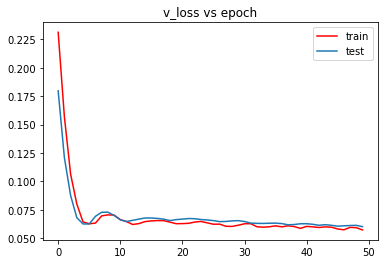

In [22]:
plt.plot(range(0,epochs),history.history['v_loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_v_loss'],label='test')
plt.title('v_loss vs epoch')
plt.legend()
plt.show()

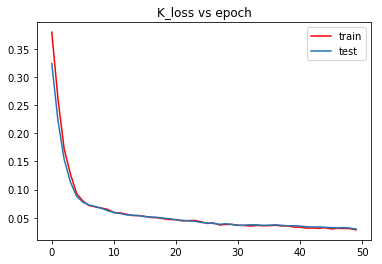

In [23]:
plt.plot(range(0,epochs),history.history['K_loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_K_loss'],label='test')
plt.title('K_loss vs epoch')
plt.legend()
plt.show()

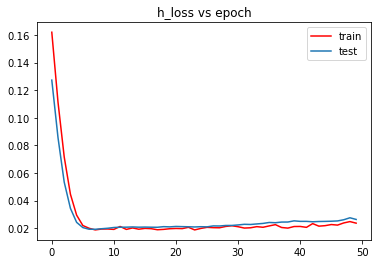

In [24]:
plt.plot(range(0,epochs),history.history['h_loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_h_loss'],label='test')
plt.title('h_loss vs epoch')
plt.legend()
plt.show()

In [25]:
plt.plot(range(0,epochs),history.history['mul_13_loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_mul_13_loss'],label='test')
plt.title('B1_loss vs epoch')
plt.legend()
plt.show()

KeyError: 'mul_13_loss'

In [ ]:
plt.plot(range(0,epochs),history.history['mul_14_loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_mul_14_loss'],label='test')
plt.title('B2_loss vs epoch')
plt.legend()
plt.show()

In [ ]:
plt.plot(range(0,epochs),history.history['mul_17_loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_mul_17_loss'],label='test')
plt.title('B3_loss vs epoch')
plt.legend()
plt.show()

In [ ]:
plt.plot(range(0,epochs),history.history['mul_20_loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_mul_20_loss'],label='test')
plt.title('B4_loss vs epoch')
plt.legend()
plt.show() 

In [ ]:
plt.plot(range(0,epochs),history.history['sub_8_loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_sub_8_loss'],label='test')
plt.legend()
plt.title('PDE loss vs epoch')
plt.show()

In [ ]:
plt.plot(range(0,epochs),history.history['loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_loss'],label='test')
plt.title('Net loss vs epoch')
plt.legend()
plt.show()

#### **Testing** 

In [ ]:
v_pred = v.eval(m, [x1_test,x2_test])
h_pred = h.eval(m, [x1_test,x2_test])
K_pred = K.eval(m, [x1_test,x2_test])
print('MSE for v after training:',round(mean_squared_error(v_test,v_pred),10))
print('MSE for h after training:',round(mean_squared_error(h_test,h_pred),10))
print('MSE for K after training:',round(mean_squared_error(K_test,K_pred),10))


In [ ]:
fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_test, x2_test, c= v.eval(m, [x1_test,x2_test]), cmap='viridis',linewidths=.0001)
plt.xlabel('-1=<x<=1')
plt.ylabel('-.5=<y<=.5')
plt.title('v_pred (Darcy velocity)')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_test, x2_test, c= v_test, cmap='viridis',linewidths=.0001)
plt.xlabel('-1=<x<=1')
plt.ylabel('-.5=<y<=.5')
plt.title('v_test (Darcy velocity)')
plt.colorbar()
plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_test, x2_test, c= K.eval(m, [x1_test,x2_test]), cmap='viridis',linewidths=.0001)
plt.xlabel('-1=<x<=1')
plt.ylabel('-.5=<y<=.5')
plt.title('K_pred (Hydraulic Conductivity)')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_test, x2_test, c= K_test, cmap='viridis',linewidths=.0001)
plt.xlabel('-1=<x<=1')
plt.ylabel('-.5=<y<=.5')
plt.title('K_test (Hydraulic Conductivity)')
plt.colorbar()
plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_test, x2_test, c= h.eval(m, [x1_test,x2_test]), cmap='viridis',linewidths=.0001)
plt.xlabel('-1=<x<=1')
plt.ylabel('-.5=<y<=.5')
plt.title('h_pred (Pressure head)')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_test, x2_test, c= h_test, cmap='viridis',linewidths=.0001)
plt.xlabel('-1=<x<=1')
plt.ylabel('-.5=<y<=.5')
plt.title('h_test (Pressure head)')
plt.colorbar()
plt.show()

#### **Simulating**


In [ ]:
x1_sim, x2_sim = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-.5, .5, 100))
fig = plt.figure(figsize=(6, 3))
v_pred_sim =np.array(v.eval(m, [x1_sim,x2_sim]))
plt.contourf(x1_sim, x2_sim, v_pred_sim)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title('Darcys Veloctiy')
plt.show()

In [ ]:
x1_sim, x2_sim = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-.5, .5, 100))
fig = plt.figure(figsize=(6, 3))
v_pred_sim =np.array(K.eval(m, [x1_sim,x2_sim]))
plt.contourf(x1_sim, x2_sim, v_pred_sim)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.title('Hydraulic Conductivty')
plt.show()

In [ ]:
x1_sim, x2_sim = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-.5, .5, 100))
fig = plt.figure(figsize=(6, 3))
v_pred_sim =np.array(h.eval(m, [x1_sim,x2_sim]))
plt.contourf(x1_sim, x2_sim, v_pred_sim)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title('Pressure head')
plt.show()

In [ ]:
print(x1_sim.shape,x2_sim.shape,v_pred_sim.shape)